In [44]:
# 1. Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# 2. Load dataset
df_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 3. Menampilkan 7 data teratas untuk tinjauan awal
print("Preview 7 Data Teratas:")
display(df_churn.head(7))

# 4. Menampilkan informasi dasar dataset
print("\nInformasi Dataset (Tipe Data & Missing Values):")
print("-" * 50)
df_churn.info()

print("\nDimensi Dataset (Baris, Kolom):")
print(df_churn.shape)

Preview 7 Data Teratas:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No



Informasi Dataset (Tipe Data & Missing Values):
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   ob

# Data Understanding: Struktur Dataset

## 1. Dimensi Data
* **Observasi (Baris):** 7.043 data pelanggan.
* **Fitur (Kolom):** 21 variabel (20 fitur prediktor + 1 target).

## 2. Tipe Data
Berdasarkan tinjauan awal (`df.info()`), tipe data terdistribusi sebagai berikut:
* **Target Variabel:** `Churn` (Kategorikal: Yes/No).
* **Kategorikal (Object):** 17 kolom (termasuk `gender`, `InternetService`, `Contract`, dll).
* **Numerik (Int/Float):** `tenure` (durasi langganan), `MonthlyCharges`.
    * *Catatan Khusus:* Kolom `TotalCharges` saat ini terbaca sebagai **Object**, padahal seharusnya numerik. Ini mengindikasikan adanya nilai string kosong atau karakter non-numerik yang perlu ditangani saat *Data Cleaning*.
* **Biner Numerik:** `SeniorCitizen` (0 = Tidak, 1 = Ya).

## 3. Kelompok Fitur
Variabel dalam dataset ini merepresentasikan empat aspek utama pelanggan:

1. **Demografi**
   Informasi profil dasar pelanggan.
   * *Kolom:* `gender`, `SeniorCitizen`, `Partner`, `Dependents`.

2. **Layanan (*Services*)**
   Produk spesifik yang dilanggan oleh pelanggan (Telepon, Internet, dan fitur tambahan).
   * *Kolom:* `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`.

3. **Informasi Akun & Kontrak**
   Detail administratif mengenai status kepelangganan.
   * *Kolom:* `Contract` (Bulan ke bulan, 1 tahun, 2 tahun), `PaperlessBilling`, `PaymentMethod`.

4. **Metrik Keuangan**
   Besaran biaya yang dibebankan kepada pelanggan.
   * *Kolom:* `MonthlyCharges` (Tagihan bulanan), `TotalCharges` (Total tagihan selama berlangganan).

In [45]:
# 1. Menangani Masalah pada kolom 'TotalCharges'
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')

# 2. Mengecek Missing Value setelah konversi
print("Jumlah Missing Value per kolom:")
print(df_churn.isnull().sum())

# 3. Menangani Missing Value
df_churn['TotalCharges'] = df_churn['TotalCharges'].fillna(0)

# 4. Menghapus Kolom yang Tidak Relevan
df_churn.drop(columns=['customerID'], inplace=True)

# 5. Verifikasi Akhir
print("\nInfo Dataset Setelah Cleaning:")
print("-" * 30)
df_churn.info()

Jumlah Missing Value per kolom:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Info Dataset Setelah Cleaning:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure         

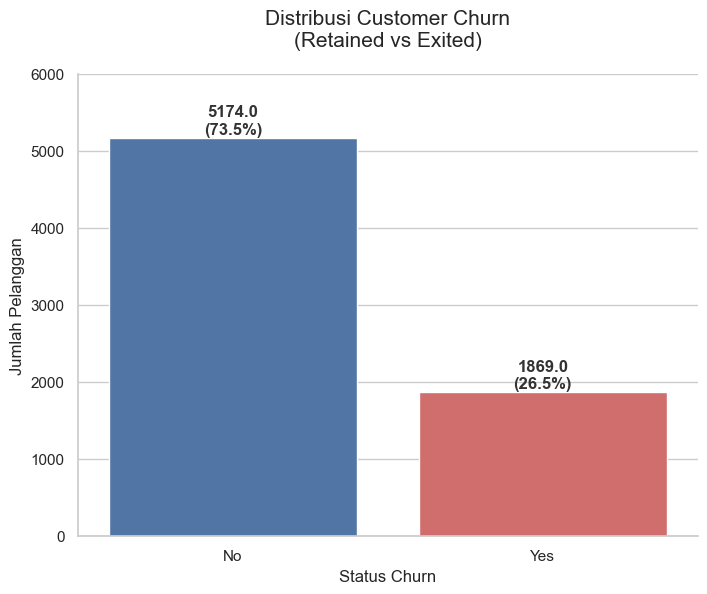

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Churn', data=df_churn, hue='Churn', legend=False, palette=['#4374B3', '#E05D5D'])

total = len(df_churn)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total)
    ax.text(p.get_x() + p.get_width() / 2., height + 50,
            f'{height}\n({percentage})',
            ha="center", fontsize=12, weight='bold', color='#333333')

plt.title('Distribusi Customer Churn\n(Retained vs Exited)', fontsize=15, pad=20)
plt.xlabel('Status Churn', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.ylim(0, 6000)
sns.despine()

plt.show()

### Business Insight: Mengapa Angka Ini Penting?

Dari visualisasi di atas, kita mendapatkan gambaran nyata tentang kesehatan retensi pelanggan perusahaan. Berikut adalah interpretasi bisnis dari data tersebut:

**1. Status: Lampu Kuning (Churn Rate 26.5%)**
Kita menemukan bahwa **1.869 pelanggan** telah berhenti berlangganan. Meskipun mayoritas masih bertahan, angka churn sebesar **26.5%** tergolong tinggi untuk standar industri telekomunikasi (di mana ambang batas waspada biasanya di angka 20%).

Secara sederhana: **Hampir 1 dari 4 pelanggan kita memutuskan untuk pergi.** Ini indikasi kuat bahwa ada ketidakpuasan atau *pain point* dalam layanan yang perlu segera diidentifikasi.

> **Potensi Kerugian Finansial (Revenue Leakage)**
>
> Jika kita mengambil asumsi konservatif bahwa rata-rata tagihan (*ARPU*) adalah **$65**, maka kehilangan 1.869 pelanggan ini setara dengan hilangnya pendapatan **$121,485 per bulan**.
>
> Dalam skala tahunan, angka ini membengkak menjadi **$1.45 Juta (± Rp22 Miliar)**. Ini adalah biaya oportunitas yang sangat besar jika tidak segera ditangani.

**2. Fokus Analisis Selanjutnya: Profiling**
Tugas utama kita sekarang adalah membedah profil kelompok **26.6% (Churn)** ini dan membandingkannya dengan kelompok **73.5% (Retained)**. Kita perlu mencari pola spesifik yang membedakan keduanya, seperti:
* Apakah mayoritas yang keluar adalah pengguna *Fiber Optic*?
* Apakah mereka pengguna kontrak bulanan (*Month-to-month*) yang memang mudah berpindah?
* Apakah ada metode pembayaran tertentu yang berkorelasi dengan tingginya pembatalan?

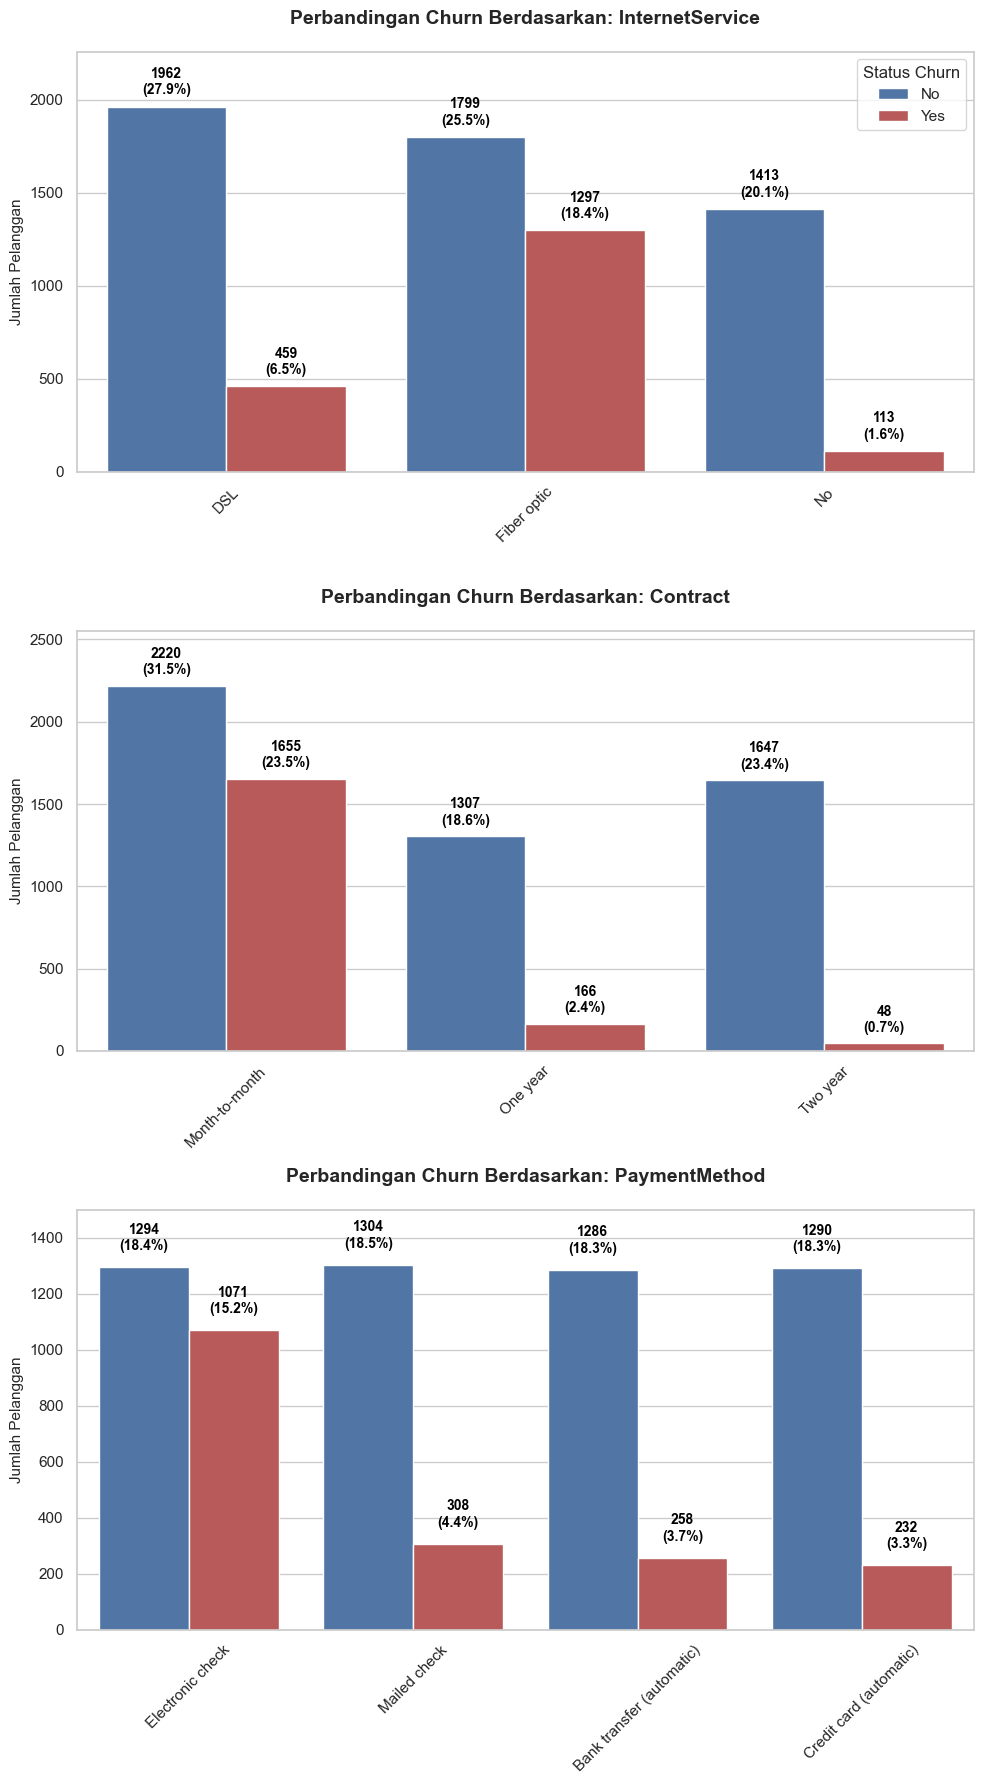

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. SETUP KANVAS
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Fitur yang akan dianalisis
features = ['InternetService', 'Contract', 'PaymentMethod']
custom_palette = ['#4374B3', '#C74B4B']

# 2. LOOPING UNTUK MEMBUAT 3 GRAFIK
for i, col in enumerate(features):
    ax = axes[i]
    
    # Membuat Countplot
    sns.countplot(x=col, hue='Churn', data=df_churn, ax=ax, palette=custom_palette)
    ax.set_title(f'Perbandingan Churn Berdasarkan: {col}', fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('')
    ax.set_ylabel('Jumlah Pelanggan', fontsize=11)
    
    ax.tick_params(axis='x', rotation=45, labelsize=11)
    
    if i == 0:
        ax.legend(title='Status Churn', loc='upper right')
    else:
        ax.get_legend().remove()

    total_data = len(df_churn)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            percentage = '{:.1f}%'.format(100 * height / total_data)
            ax.text(p.get_x() + p.get_width() / 2., height + 50, 
                    f'{int(height)}\n({percentage})',
                    ha="center", va="bottom", fontsize=10, color='black', weight='bold')
            
    ax.margins(y=0.15)

plt.tight_layout()
plt.show()

### Kesimpulan & Rekomendasi: Menangkap "High-Risk Persona"

Berdasarkan data yang telah kita bedah, kita berhasil mengidentifikasi **"Segmen Merah"** kelompok pelanggan yang memiliki probabilitas tertinggi untuk berhenti berlangganan.

#### Siapa Pelanggan yang Paling "Rawan"?
Pelanggan dengan **kombinasi tiga ciri** berikut adalah alarm bahaya bagi perusahaan:

1. **Layanan: Fiber Optic**
    * Mungkin memiliki ekspektasi performa yang sangat tinggi atau sensitif terhadap harga mahal.
2. **Kontrak: Month-to-month (Bulanan)**
    * Tidak memiliki ikatan jangka panjang, sehingga bebas pergi kapan saja tanpa denda.
3. **Pembayaran: Electronic Check**
    * Metode pembayaran yang ribet (manual) meningkatkan "rasa berat" saat membayar tagihan setiap bulan.

---

### Strategic Action Plan

> **Prioritas Utama: Tim Retensi**
>
> Jangan menunggu mereka menelepon untuk berhenti. Lakukan pendekatan proaktif pada segmen di atas dengan strategi berikut:
>
> * **Insentif Pindah Kontrak:** Tawarkan diskon biaya bulanan jika mereka bersedia beralih dari kontrak bulanan ke kontrak 1 tahun.
> * **Promo Auto-Pay:** Berikan potongan 5% atau bonus kecepatan internet jika mereka mengubah metode bayar ke *Credit Card* atau *Bank Transfer* (otomatis).
> * **Cek Kepuasan Teknis:** Khusus pengguna Fiber Optic, pastikan tidak ada gangguan teknis yang membuat mereka merasa rugi membayar mahal.

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.8218594748048261

Confusion Matrix:
[[934 102]
 [149 224]]


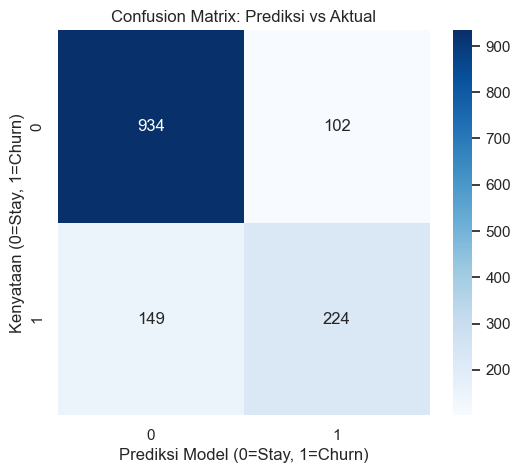

In [47]:
# 1. Import Library Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Data Preprocessing (Encoding)
# 1 = Churn (Yes), 0 = Stay (No)
df_churn['Churn'] = df_churn['Churn'].map({'Yes': 1, 'No': 0})

# B. One-Hot Encoding untuk fitur lainnya
df_model = pd.get_dummies(df_churn, drop_first=True)

# 3. Train-Test Split
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Membagi data: 80% untuk Latihan (Train), 20% untuk Ujian (Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Melatih Model (Logistic Regression)
log_model = LogisticRegression(max_iter=1000) # max_iter diperbesar agar model punya cukup waktu mencari pola
log_model.fit(X_train, y_train)

# 5. Evaluasi Model
y_pred = log_model.predict(X_test)

# Menampilkan Hasil
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualisasi Confusion Matrix agar lebih mudah dibaca bisnis
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Prediksi vs Aktual')
plt.xlabel('Prediksi Model (0=Stay, 1=Churn)')
plt.ylabel('Kenyataan (0=Stay, 1=Churn)')
plt.show()

**Random Forest**

=== Evaluasi Random Forest ===
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.44      0.52       373

    accuracy                           0.78      1409
   macro avg       0.73      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409



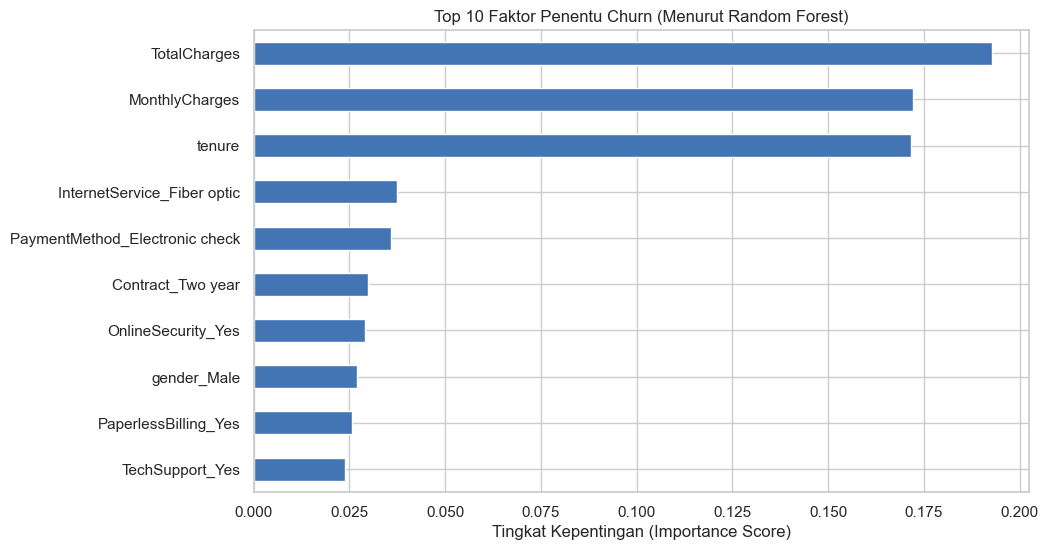

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Split Data (Sama seperti sebelumnya)

# 2. Train Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 3. Prediksi
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluasi (Bandingkan dengan Logistic Regression tadi)
print("=== Evaluasi Random Forest ===")
print(classification_report(y_test, y_pred_rf))

# 5. Feature Importance (Fitur apa yang paling mempengaruhi Churn?)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.nlargest(10) # Ambil 10 fitur teratas

plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh', color='#4374B3')
plt.title('Top 10 Faktor Penentu Churn (Menurut Random Forest)')
plt.xlabel('Tingkat Kepentingan (Importance Score)')
plt.show()

# Kesimpulan Analisis & Interpretasi Model

### 1. Mengapa Random Forest?
Kami memilih **Random Forest** karena kemampuannya menangkap pola **Non-Linear** dari perilaku manusia yang kompleks. Berbeda dengan regresi biasa, model ini dapat melihat interaksi antar variabel (misalnya: hubungan antara tingginya tagihan dengan jenis kontrak tertentu).

### 2. Penjelasan Ilmiah Faktor Penentu (Feature Importance)
Berdasarkan grafik di atas, berikut adalah 3 pilar utama pemicu churn:

* **Faktor Finansial (`MonthlyCharges`) → Price Sensitivity**
    Pelanggan sangat sensitif terhadap nilai uang. Tagihan tinggi tanpa persepsi "nilai tambah" yang setara akan memicu disonansi kognitif, mendorong pelanggan mencari alternatif yang lebih murah.

* **Faktor Durasi (`tenure`) → Habituation (Kebiasaan)**
    Terdapat korelasi negatif kuat: **Semakin lama berlangganan, semakin kecil peluang churn.** Pelanggan baru (0-6 bulan) berada di "Zona Bahaya" karena belum terbentuk loyalitas atau kebiasaan (*habit*).

* **Faktor Ikatan (`Contract`) → Exit Barrier (Hambatan Keluar)**
    Kontrak *Month-to-month* memiliki hambatan keluar nol (bebas penalti). Ini membuat keputusan berhenti menjadi sangat mudah dan impulsif dibandingkan kontrak tahunan.

---

### Rekomendasi Strategis
**"Focus on the Golden Window (0-6 Bulan)"**

Profil risiko tertinggi adalah: **Pelanggan Baru + Tagihan Tinggi + Kontrak Bulanan.**
* **Action:** Lakukan intervensi agresif di 3 bulan pertama.
* **Strategy:** Tawarkan insentif diskon untuk migrasi dari kontrak *Bulanan* ke *Tahunan* guna menciptakan hambatan keluar (*exit barrier*) secara buatan namun menguntungkan.